# Receiver Operating Characteristic Curve for Feature Detection

<center>![image](images/roc_simple.png)</center>

The ROC curve plots the __true positive rate (sensitivity)__:

$$\frac{\text{true positives}}{\text{true positives} + \text{false positives}}$$

versus the __false positive rate (1 - specificity)__:

$$\frac{\text{false positives}}{\text{true negatives} + \text{false positives}}$$ 

These values can be calculated from the confusion matrix. The confusion matrix will have to be constructed by hand.

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline


from detector import model

11 detections with threshold: 0.8



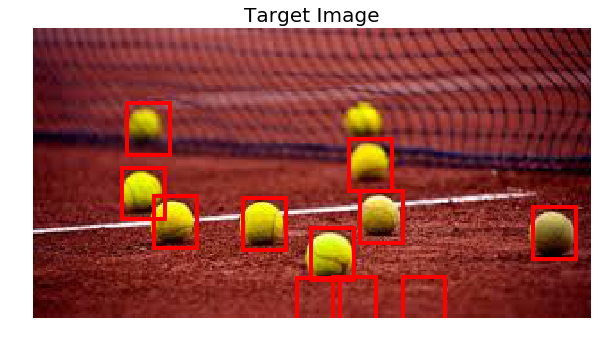

In [2]:
model(image_path='images/target_tennis.jpg', template_path='images/template_tennis.jpg',
     threshold=0.8, number = 'many', analyze=True)

149 detections with threshold: 0.5



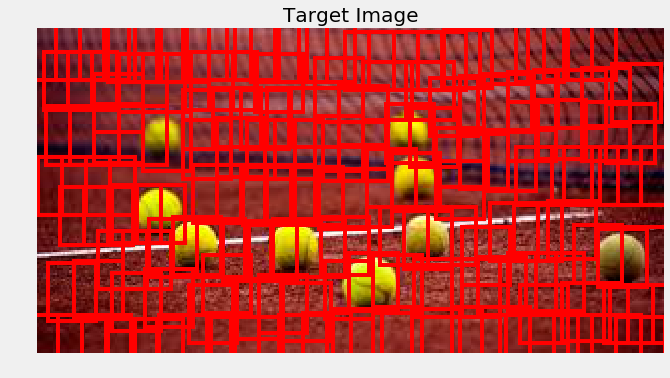

117 detections with threshold: 0.6



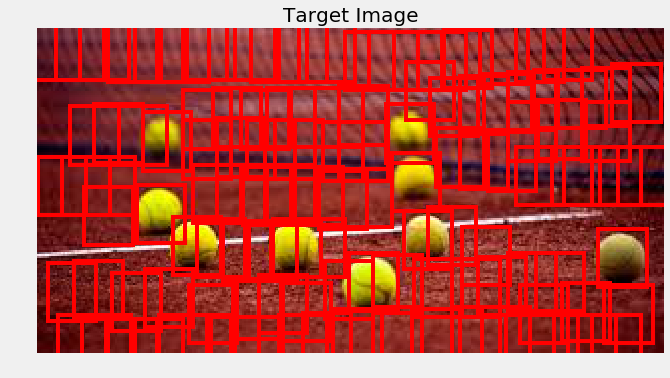

61 detections with threshold: 0.7



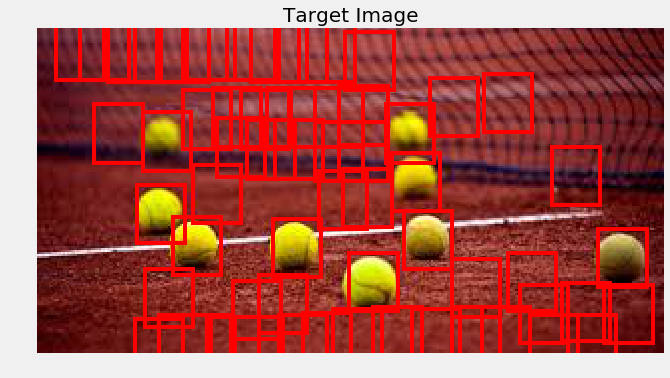

11 detections with threshold: 0.8



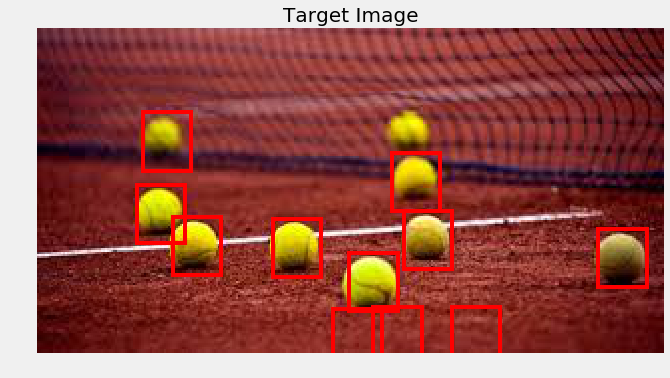

3 detections with threshold: 0.9



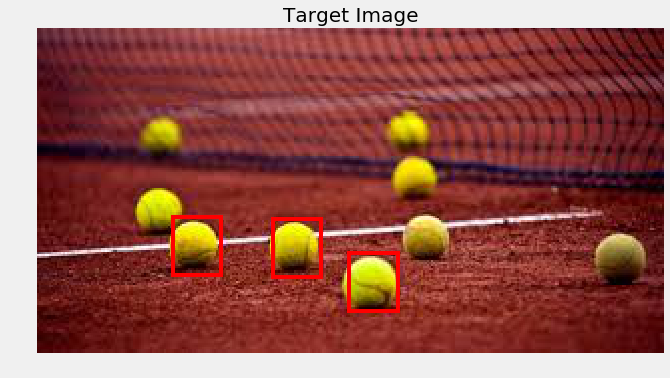

1 detections with threshold: 0.99



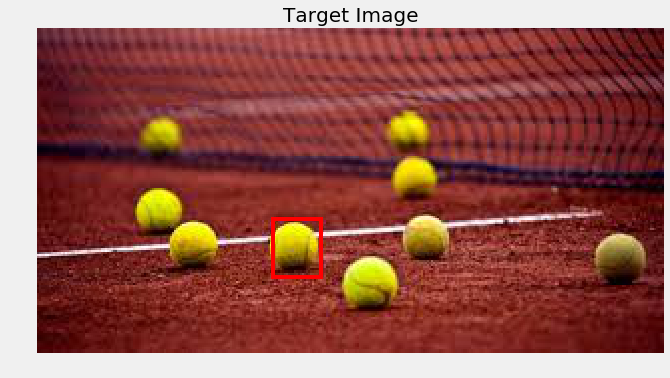

In [21]:
threshold_list = [0.5, 0.6, 0.7, 0.8, 0.9, 0.99]

for threshold in threshold_list:
    model(image_path='images/target_tennis.jpg', template_path='images/template_tennis.jpg',
          threshold=threshold, analyze=True)

### Actual Negatives

Defining acutal negatives is difficult in this case. I will say that negatives are every possible patch which does not contain the feature. As the convolution covers every single possible patch, the number of patches is the pixel width times the pixel height of the image. The number of actual negatives is therefore the number of patches - the number of features in the image.

In [24]:
image = plt.imread('images/target_tennis.jpg')
actual_negatives = (image.shape[0] * image.shape[1]) - 9
print(actual_negatives)

50535


In [11]:
tp_list = [9, 9, 9, 8, 3, 1]
fp_list = [140, 108, 52, 3, 0, 0]
tn_list = [50535 - 149, 50535 - 117, 50535 - 61, 50535 - 11, 50535 - 3, 50535 - 1]
fn_list = [0, 0,  0, 1, 6, 10]

In [33]:
def analyze_results(tp_list, fp_list, tn_list, fn_list, threshold_list,
                   actual_negatives, actual_positives):
    
    tpr_list = []
    fnr_list = []
    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(8, 8))
    plt.xticks(rotation=60)
    
    max_fnr = actual_positives / actual_negatives
    
    for tp, fp, tn, fn, threshold in zip(tp_list, fp_list, tn_list, fn_list, threshold_list):
        
        # First row is predicted positive, second row is predicted negative
        # First column is actually positive, second column is actually negative
        confusion_matrix = np.array([[tp, fp], [fn, tn]])
        if (tn == 0) & (fn == 0):
            fnr = 0
        else:
            fnr = fn / (tn + fn)
            
        tpr = tp / (tp + fp)
    
        tpr_list.append(tpr)
        fnr_list.append(fnr)
     
        plt.plot(fnr / max_fnr, tpr + 0.05, marker='$%.2f$' % threshold, ms = 30, color = 'k', 
                label = 'threshold') 
        
    plt.plot(np.array(fnr_list) / max_fnr, tpr_list, '-', color = 'red'); 
    plt.xlabel('False Negative Rate'); plt.ylabel('True Positive Rate');
    plt.title('ROC Curve'); 
    plt.show()

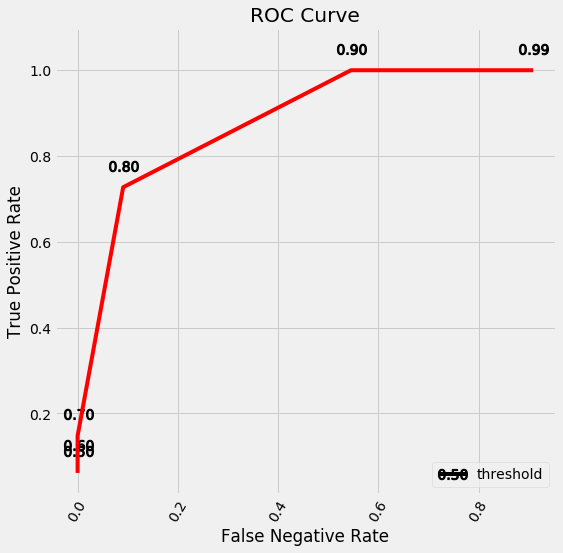

In [34]:
analyze_results(tp_list, fp_list, tn_list, fn_list, threshold_list, actual_negatives=50535, actual_positives=11)

## Shifting the Curve

One way to shift the curve would be to adjust how far apart boxes have to be in the method, or using a different template. I will choose another of the images for the template. 

133 detections with threshold: 0.5



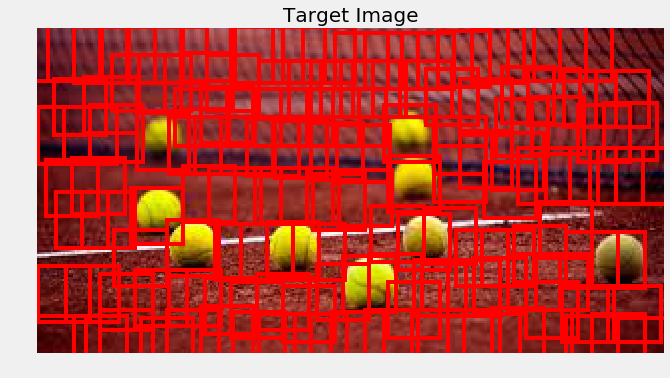

102 detections with threshold: 0.6



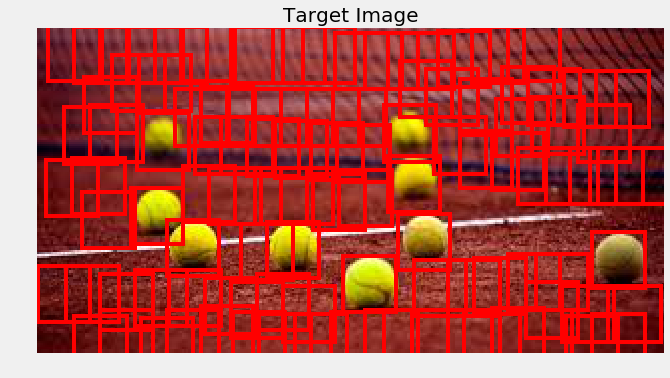

45 detections with threshold: 0.7



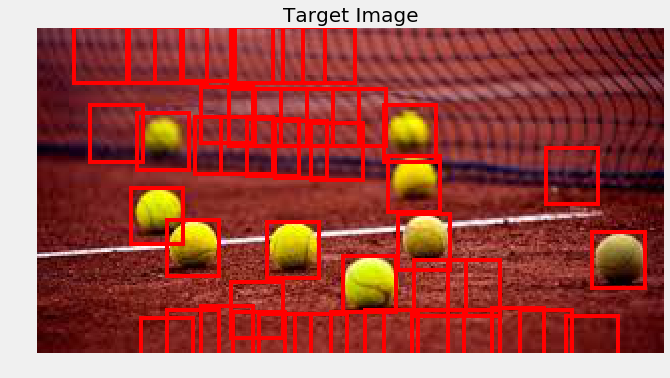

7 detections with threshold: 0.8



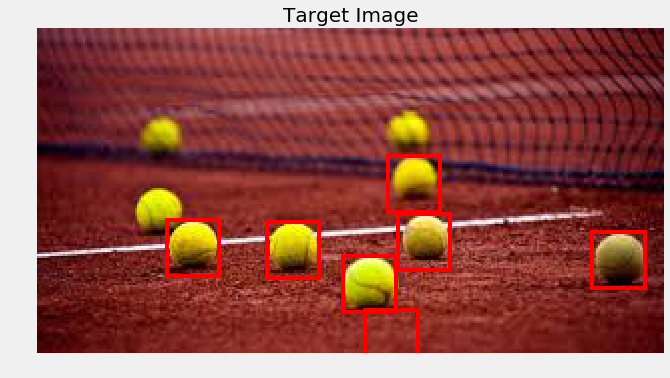

2 detections with threshold: 0.9



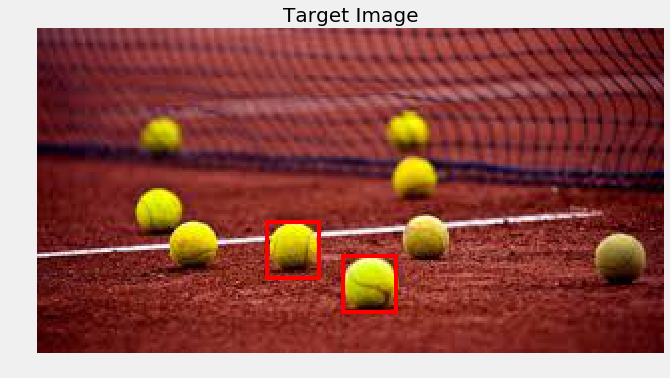

1 detections with threshold: 0.99



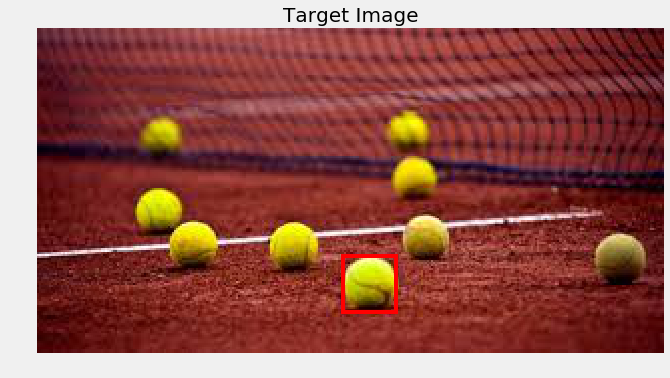

In [35]:
threshold_list = [0.5, 0.6, 0.7, 0.8, 0.9, 0.99]

for threshold in threshold_list:
    model(image_path='images/target_tennis.jpg', template_path='images/template_tennis_two.jpg',
          threshold=threshold, analyze=True)

In [38]:
tp_list = [9, 9, 9, 6, 2, 1]
fp_list = [124, 93, 36, 1, 0, 0]
tn_list = [50535 - 133, 50535 - 102, 50535 - 45, 50535 - 7, 50535 - 2, 50535 - 1]
fn_list = [0, 0,  0, 3, 9, 10]

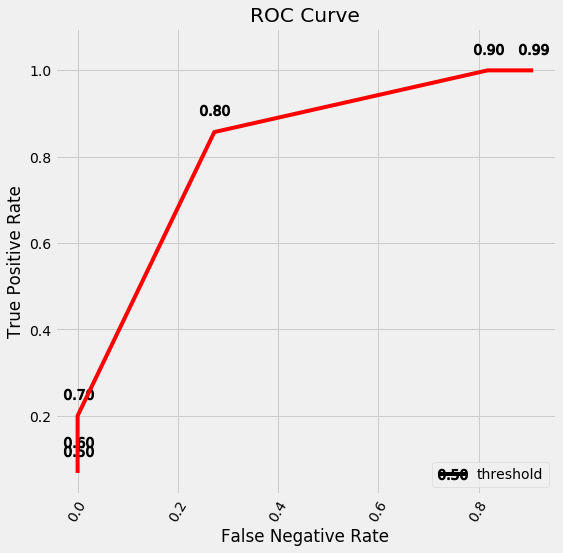

In [39]:
analyze_results(tp_list, fp_list, tn_list, fn_list, threshold_list, actual_negatives=50535, actual_positives=11)

Using different templates and different limits on the bounding boxes would shift the ROC curve. Ideally there would be some method to automate the result recording rather than doing it by hand. However, for now, this still requires human effort.